In [1]:
import numpy as np

def criaDatasetBidimensionalBinário(n=20):
    """
    Cria um dataset bidimensional binário com
    rótulos igual 1 para todo exemplo que tiver
    o valor da primeira característica maior do
    que a da segunda, e -1 para os demais.
    """
    X = np.random.uniform(size=(n,2))
    y = np.array(X[:,0]>X[:,1], dtype=int)*2-1
    return X, y

Xtr, ytr = criaDatasetBidimensionalBinário()
Xtr, ytr

(array([[0.88005489, 0.40907855],
        [0.17679829, 0.08480494],
        [0.3678578 , 0.28629649],
        [0.43885843, 0.97011601],
        [0.89816585, 0.04269253],
        [0.90903287, 0.14383834],
        [0.58533133, 0.87337242],
        [0.40751805, 0.52636978],
        [0.34885158, 0.78480259],
        [0.37665216, 0.49577489],
        [0.96384305, 0.68514909],
        [0.67756215, 0.45713155],
        [0.68316479, 0.65017138],
        [0.60920216, 0.63611955],
        [0.83929701, 0.99300088],
        [0.95619454, 0.9079443 ],
        [0.33853509, 0.02707926],
        [0.48547091, 0.83397117],
        [0.14177085, 0.01537765],
        [0.60311374, 0.28765349]]),
 array([ 1,  1,  1, -1,  1,  1, -1, -1, -1, -1,  1,  1,  1, -1, -1,  1,  1,
        -1,  1,  1]))

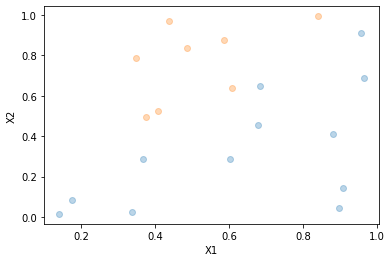

In [2]:
import matplotlib.pyplot as plt

def plotaDatasetBidimensional(X, y):
    """
    Plota um dataset bidimensional.
    """
    plt.xlabel('X1')
    plt.ylabel('X2')
    for k in set(y):
        plt.plot(X[:,0][y==k],X[:,1][y==k], "o", alpha=0.3)

plotaDatasetBidimensional(Xtr, ytr)

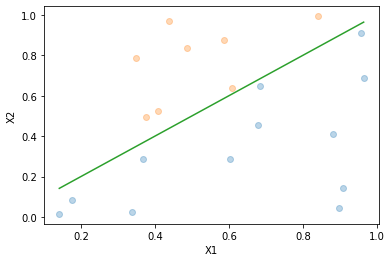

In [3]:
def plotaHiperplanoDatasetBidimensional(X, y, vetor, intercept=0):
    """
    Plota um dataset bidimensional com um hiperplano definido por um
    vetor e o valor em que este vetor intercepta o eixo vertical.
    """
    x0min = min(X[:,0])
    x0max = max(X[:,0])
    xs = np.linspace(x0min, x0max, num=2)
    ys = (-vetor[0] / vetor[1]) * xs - intercept / vetor[1]
    plt.plot(xs,ys)

plotaDatasetBidimensional(Xtr, ytr)
plotaHiperplanoDatasetBidimensional(Xtr, ytr, [1,-1])

In [4]:
def sign(a):
    return (a >= 0) * 2 - 1

In [5]:
def accuracy(yactual, ypred):
    return sum(yactual == ypred)/len(yactual)

1.0
[ 17.29736799 -17.71744368]


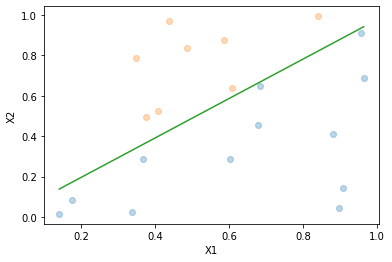

In [6]:
from sklearn.base import BaseEstimator, ClassifierMixin
import random

class Perceptron(BaseEstimator, ClassifierMixin):
    """
    Versão do Perceptron com limite de iterações,
    treinado pelo Perceptron Learning Algorithm (PLA).
    """
    def __init__(self, max_iter=100):
        self.w = None
        self.activation = sign
        self.max_iter = max_iter

    def fit(self, X, y):
        self.w = np.random.uniform(-1, 1, size=X.shape[1])
        for _ in range(self.max_iter):
            ypred = self.predict(X)
            erros = y - ypred
            custo = sum(erros**2)
            if custo == 0:
                break
            self.w += X.T @ erros

    def predict(self, X):
        a = X @ self.w
        ypred = self.activation(a)
        return ypred

perceptron = Perceptron()
perceptron.fit(Xtr, ytr)
print(accuracy(ytr, perceptron.predict(Xtr)))
print(perceptron.w)
plotaDatasetBidimensional(Xtr, ytr)
plotaHiperplanoDatasetBidimensional(Xtr, ytr, perceptron.w)

In [7]:
Xte, yte = criaDatasetBidimensionalBinário(1000)

0.99


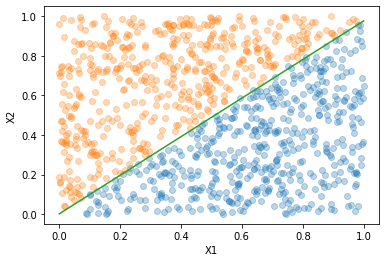

In [8]:
print(accuracy(yte, perceptron.predict(Xte)))
plotaDatasetBidimensional(Xte, yte)
plotaHiperplanoDatasetBidimensional(Xte, yte, perceptron.w)